## Breast_Cancer_Detection

### Loading Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets 

In [2]:
df1 = sklearn.datasets.load_breast_cancer()
X = df1.data
y = df1.target

In [3]:
df = pd.DataFrame(data=X, columns=df1.feature_names)
df["target"] = pd.Series(y, name="target")
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


### Feature engineering

#### Univariate analysis

##### Finding Null values

In [4]:
df.isna().any()

mean radius                False
mean texture               False
mean perimeter             False
mean area                  False
mean smoothness            False
mean compactness           False
mean concavity             False
mean concave points        False
mean symmetry              False
mean fractal dimension     False
radius error               False
texture error              False
perimeter error            False
area error                 False
smoothness error           False
compactness error          False
concavity error            False
concave points error       False
symmetry error             False
fractal dimension error    False
worst radius               False
worst texture              False
worst perimeter            False
worst area                 False
worst smoothness           False
worst compactness          False
worst concavity            False
worst concave points       False
worst symmetry             False
worst fractal dimension    False
target    

##### Imbalance class check

In [5]:
print(df.target.value_counts())
print("Ratio of malignant to bening %f"%(df.target.value_counts()[1]/df.target.value_counts()[0]))

1    357
0    212
Name: target, dtype: int64
Ratio of malignant to bening 1.683962


##### Distribution of data

In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


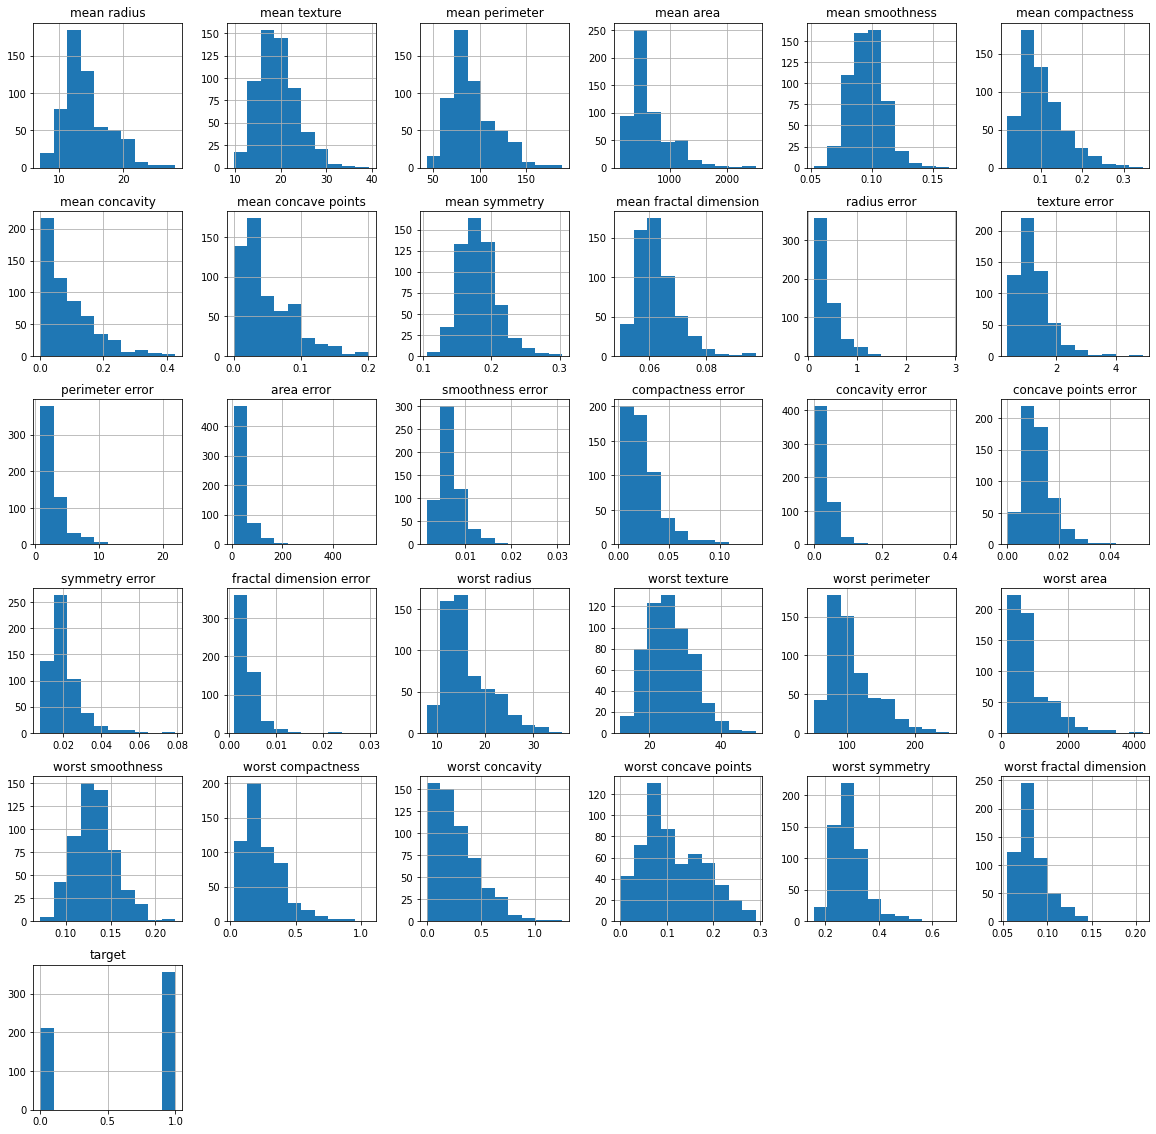

In [7]:
df.hist(figsize=(20,20))
plt.show()

In [8]:
## Not normallly distributed
## No big outliers in any column (Since knowledge of dataset isn't clear no values can be removed)

##### train-test split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, stratify=df.iloc[:,-1])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)


##### Standardizing the data

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test) 

In [11]:
df_train = pd.DataFrame(X_train, columns=list(df.columns)[:-1])
df_test = pd.DataFrame(X_test, columns=list(df.columns)[:-1])

In [12]:
df_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,-2.226304e-15,-3.595393e-15,6.976552e-16,-3.347406e-18,-4.867434e-15,-7.347556e-16,5.542747e-16,5.263796e-16,-3.018245e-16,-3.062877e-16,9.127261e-16,8.535886e-16,-9.954349e-16,1.087907e-16,-2.191749e-15,-6.694812e-18,1.179403e-15,1.167338e-15,-5.621550e-16,5.690590e-17,4.744948e-16,-8.991970e-16,-2.988955e-15,-9.534528e-16,8.669084e-16,-5.545536e-16,1.417069e-16,1.520838e-15,6.555337e-17,-9.595897e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-2.037475e+00,-2.181134e+00,-1.990069e+00,-1.442320e+00,-3.029756e+00,-1.597451e+00,-1.116247e+00,-1.254572e+00,-2.735468e+00,-1.746444e+00,-1.015799e+00,-1.517170e+00,-9.962938e-01,-6.850672e-01,-1.696173e+00,-1.291485e+00,-1.285129e+00,-1.974334e+00,-1.306680e+00,-1.128684e+00,-1.736858e+00,-2.183036e+00,-1.701590e+00,-1.218255e+00,-2.588918e+00,-1.425585e+00,-1.329802e+00,-1.750918e+00,-2.059979e+00,-1.531207e+00
25%,-6.985629e-01,-7.673897e-01,-6.825377e-01,-6.606487e-01,-7.445559e-01,-7.192326e-01,-7.408588e-01,-7.344989e-01,-7.035531e-01,-7.312910e-01,-6.011272e-01,-6.775795e-01,-5.983684e-01,-4.716256e-01,-6.161206e-01,-6.788281e-01,-6.766409e-01,-6.709976e-01,-6.526387e-01,-6.281695e-01,-6.756639e-01,-7.622067e-01,-6.896835e-01,-6.368754e-01,-7.288783e-01,-6.857327e-01,-7.604410e-01,-7.693499e-01,-6.397123e-01,-7.006876e-01
50%,-2.311086e-01,-9.293242e-02,-2.458805e-01,-3.041368e-01,-3.257601e-02,-1.971441e-01,-3.467572e-01,-3.941743e-01,-7.862637e-02,-1.707684e-01,-3.041730e-01,-2.140443e-01,-2.920050e-01,-3.433035e-01,-1.959573e-01,-2.877135e-01,-2.419203e-01,-1.518318e-01,-2.315547e-01,-2.482198e-01,-2.753394e-01,-5.179203e-02,-2.961601e-01,-3.441575e-01,-4.521501e-02,-2.918024e-01,-2.313846e-01,-2.250237e-01,-1.457890e-01,-2.403579e-01
75%,5.114838e-01,5.764068e-01,4.991310e-01,3.690671e-01,6.063577e-01,4.655780e-01,4.902877e-01,5.313202e-01,5.354635e-01,4.638787e-01,2.300185e-01,4.629445e-01,2.029162e-01,8.043558e-02,3.251095e-01,3.976786e-01,4.436860e-01,4.959399e-01,3.450465e-01,3.118998e-01,4.441140e-01,6.670229e-01,4.737994e-01,2.717409e-01,5.725660e-01,5.118769e-01,5.182537e-01,7.220570e-01,4.153322e-01,4.443858e-01
max,3.894561e+00,4.545241e+00,3.894789e+00,5.076794e+00,4.769108e+00,4.451280e+00,4.208304e+00,3.871636e+00,3.932825e+00,4.917703e+00,8.461681e+00,6.524729e+00,8.817968e+00,1.006229e+01,7.756939e+00,5.871670e+00,4.896402e+00,4.771398e+00,6.733997e+00,7.595048e+00,4.041381e+00,3.439480e+00,4.213855e+00,5.804212e+00,3.953081e+00,4.906235e+00,4.351667e+00,2.641122e+00,5.642339e+00,6.615639e+00


### Feature Selection

#### Bivariate analysis

##### Pearson's Coorelation 

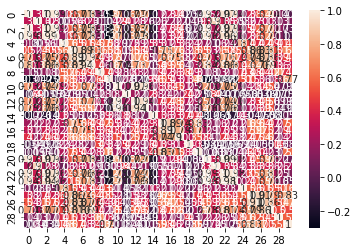

In [13]:
import seaborn as sns
fig = sns.heatmap(np.array(df_train.corr()), annot=True)
sns.set(rc={"figure.figsize":(30,30)})
plt.show()

In [14]:
df_train_corr = pd.DataFrame(np.array(df_train.corr()))

##### Dropping highly correlated columns

In [15]:
del_columns = []
for i in range(len(df_train.columns)):
  for j in range(i):
    if (df_train_corr.iloc[i,j]>0.80) or (df_train_corr.iloc[i,j]<-0.80):
      if list(df_train.columns)[i] not in del_columns:
        del_columns.append(list(df_train.columns)[i])
        print("Correlation : ", df_train_corr.iloc[i,j])

Correlation :  0.99784325608157
Correlation :  0.9868313496390464
Correlation :  0.8939347491611417
Correlation :  0.832813626994813
Correlation :  0.9746349033900432
Correlation :  0.8182210839242114
Correlation :  0.8869845848056915
Correlation :  0.8300342647920906
Correlation :  0.969711353102268
Correlation :  0.9148351244675537
Correlation :  0.9655658567615791
Correlation :  0.9415101081320392
Correlation :  0.8112044278316258
Correlation :  0.8560537221278528
Correlation :  0.8285289624609611
Correlation :  0.8092234801963938
Correlation :  0.8296344473337858


In [16]:
del_columns

['mean perimeter',
 'mean area',
 'mean concavity',
 'mean concave points',
 'perimeter error',
 'area error',
 'concavity error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst fractal dimension']

In [17]:
df_train.drop(columns=del_columns, axis=1, inplace=True)
df_test.drop(columns=del_columns, axis=1, inplace=True)
df_train.head(3)

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concave points error,symmetry error,worst symmetry
0,-0.148286,-0.140702,0.246231,0.028185,-0.373028,0.821794,-0.303315,0.059774,-0.081075,-0.201636,0.255551,-0.245456,-0.111621
1,-0.499228,-1.471419,-1.544895,-1.206905,-0.737870,-0.350079,-0.274143,0.481169,1.092169,-0.873040,-0.672193,0.911801,-0.975702
2,0.309341,-1.146132,0.819336,2.004106,2.542092,1.088642,0.107496,-0.899301,-0.065008,1.453742,1.739942,1.842009,2.649187


### ML Modeling

#### KNN 

In [18]:
print("value count of beningn %d \nvalue count of malignant %d"%(y_train.value_counts()[0], y_train.value_counts()[1]))   
#Imbalanced dataset
print("Percentage imbalance in dataset %0.2f %%"%(y_train.value_counts()[0]/(y_train.value_counts()[0]+y_train.value_counts()[1])*100)) 

value count of beningn 148 
value count of malignant 250
Percentage imbalance in dataset 37.19 %


##### Over and under sampling the datset

In [19]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=3)
df_train_s, y_train_s = smk.fit_resample(df_train, y_train)

In [20]:
y_train_s.value_counts()

1    247
0    247
Name: target, dtype: int64

##### fitting to KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn1 = KNeighborsClassifier()
knn1.fit(df_train_s, y_train_s)
y_train_pred = knn1.predict(df_train_s)
y_test_pred = knn1.predict(df_test) 

Traning accuracy is 0.97
Test accuracy is 0.91

 CLASSIFICATION REPORT 

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        64
           1       0.93      0.93      0.93       107

    accuracy                           0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171

Confusion matrix 



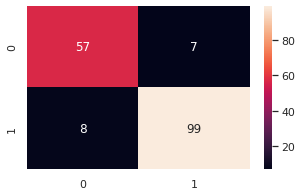

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Traning accuracy is %0.2f"%accuracy_score(y_train_s, y_train_pred))
print("Test accuracy is %0.2f"%accuracy_score(y_test, y_test_pred))
print("\n CLASSIFICATION REPORT \n")
print(classification_report(y_test, y_test_pred))
print("Confusion matrix \n")
sns.set(rc={"figure.figsize":(5,3)})
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
plt.show()

#### Naive Bayes

Gaussian Naive Bayes gave better accuracy but generally <br>complement naive bayes is used for imbalanced datasets

##### Gaussian Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb1 = GaussianNB()
gnb1.fit(df_train, y_train)
y_train_pred = gnb1.predict(df_train) 
y_test_pred = gnb1.predict(df_test)

Traning accuracy is 0.90
Test accuracy is 0.87

 CLASSIFICATION REPORT 

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        64
           1       0.88      0.92      0.89       107

    accuracy                           0.87       171
   macro avg       0.86      0.85      0.85       171
weighted avg       0.86      0.87      0.86       171

Confusion matrix 



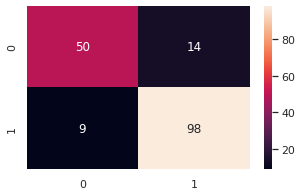

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Traning accuracy is %0.2f"%accuracy_score(y_train, y_train_pred))
print("Test accuracy is %0.2f"%accuracy_score(y_test, y_test_pred))
print("\n CLASSIFICATION REPORT \n")
print(classification_report(y_test, y_test_pred))
print("Confusion matrix \n")
sns.set(rc={"figure.figsize":(5,3)})
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
plt.show()

##### Complement naive bayes (works with imbalanced datasets)

In [26]:
from sklearn.model_selection import train_test_split

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, stratify=df.iloc[:,-1])
print(X_train_nb.shape, X_test_nb.shape, y_train_nb.shape, y_test_nb.shape)

(398, 30) (171, 30) (398,) (171,)


In [27]:
## Minmax normalization is needed for Complement naive bayes but MinMax was applied after standardizing as it gives better results when we have outliers
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
mm = MinMaxScaler()
X_train_nb = ss.fit_transform(X_train_nb) 
X_test_nb = ss.fit_transform(X_test_nb) 
X_train_nb = mm.fit_transform(X_train_nb)
X_test_nb = mm.transform(X_test_nb)

In [28]:
df_train_nb = pd.DataFrame(X_train_nb, columns=list(df.columns)[:-1])
df_test_nb = pd.DataFrame(X_test_nb, columns=list(df.columns)[:-1])

In [29]:
## Using only imbalanced dataset as complement Naive bayes can deal with independent classes
from sklearn.naive_bayes import ComplementNB
cnb1 = ComplementNB()
cnb1.fit(df_train_nb, y_train_nb)
y_train_pred = cnb1.predict(df_train_nb)
y_test_pred = cnb1.predict(df_test_nb)

Traning accuracy is 0.85
Test accuracy is 0.83

 CLASSIFICATION REPORT 

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        64
           1       0.90      0.82      0.86       107

    accuracy                           0.83       171
   macro avg       0.82      0.83      0.82       171
weighted avg       0.84      0.83      0.83       171

Confusion matrix 



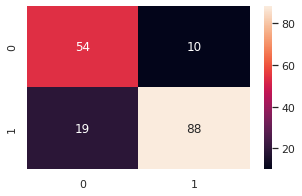

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Traning accuracy is %0.2f"%accuracy_score(y_train_nb, y_train_pred))
print("Test accuracy is %0.2f"%accuracy_score(y_test_nb, y_test_pred))
print("\n CLASSIFICATION REPORT \n")
print(classification_report(y_test_nb, y_test_pred))
print("Confusion matrix \n")
sns.set(rc={"figure.figsize":(5,3)})
sns.heatmap(confusion_matrix(y_test_nb, y_test_pred), annot=True)
plt.show()

#### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(df_train, y_train)
y_train_pred = lg.predict(df_train)
y_test_pred = lg.predict(df_test)

Traning accuracy is 0.97
Test accuracy is 0.95

 CLASSIFICATION REPORT 

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        64
           1       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Confusion matrix 



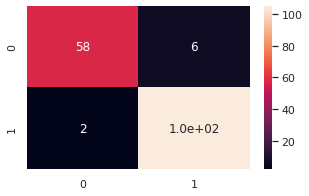

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Traning accuracy is %0.2f"%accuracy_score(y_train, y_train_pred))
print("Test accuracy is %0.2f"%accuracy_score(y_test, y_test_pred))
print("\n CLASSIFICATION REPORT \n")
print(classification_report(y_test, y_test_pred))
print("Confusion matrix \n")
sns.set(rc={"figure.figsize":(5,3)})
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
plt.show()

#### SVM

In [33]:
from sklearn.svm import SVC

In [34]:
sv1 = SVC()
sv1.fit(df_train, y_train)
y_train_pred = sv1.predict(df_train)
y_test_pred = sv1.predict(df_test)

Traning accuracy is 0.97
Test accuracy is 0.94

 CLASSIFICATION REPORT 

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

Confusion matrix 



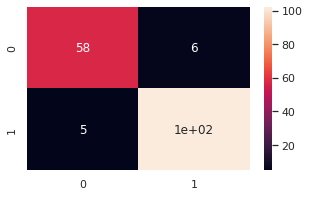

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Traning accuracy is %0.2f"%accuracy_score(y_train, y_train_pred))
print("Test accuracy is %0.2f"%accuracy_score(y_test, y_test_pred))
print("\n CLASSIFICATION REPORT \n")
print(classification_report(y_test, y_test_pred))
print("Confusion matrix \n")
sns.set(rc={"figure.figsize":(5,3)})
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
plt.show()

## Breast_Cancer_Detection - Final results

<pre> FINAL TRAINING AND TEST ACCURACY OF EACH MODEL <br/>
                          Training accuracy    Testing accuracy <br>
KNN                             0.97                 0.91
Naive Bayes                     0.90                 0.87
Logistic Regression             0.97                 0.95
SVM                             0.97                 0.94